In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [4]:
df = pd.read_csv("personalized_learning_dataset.csv")

print(df.head())

  Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          9

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [6]:
# Удалим идентификатор и название курса (неинформативны)
df.drop(columns=["Student_ID", "Course_Name"], inplace=True)

# Кодируем целевую переменную: Yes -> 1, No -> 0
df["Dropout_Likelihood"] = df["Dropout_Likelihood"].map({"Yes": 1, "No": 0})

# Кодирование категориальных признаков
df = pd.get_dummies(df, drop_first=True)

# Делим на признаки и целевой столбец
X = df.drop("Dropout_Likelihood", axis=1)
y = df["Dropout_Likelihood"]

# Делим выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

In [8]:
# Бэггинг
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

# Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Сверхслучайные деревья (если хочешь — альтернатива)
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)

# AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "Extra rees": et,
    "AdaBoost": ada,
    "Gradient Boosting": gb
}

print("📊 Сравнение моделей:\n")
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")

📊 Сравнение моделей:

Bagging: Accuracy = 0.7995, F1 Score = 0.0475
Random Forest: Accuracy = 0.8115, F1 Score = 0.0000
Extra rees: Accuracy = 0.8105, F1 Score = 0.0052
AdaBoost: Accuracy = 0.8115, F1 Score = 0.0000
Gradient Boosting: Accuracy = 0.8115, F1 Score = 0.0053


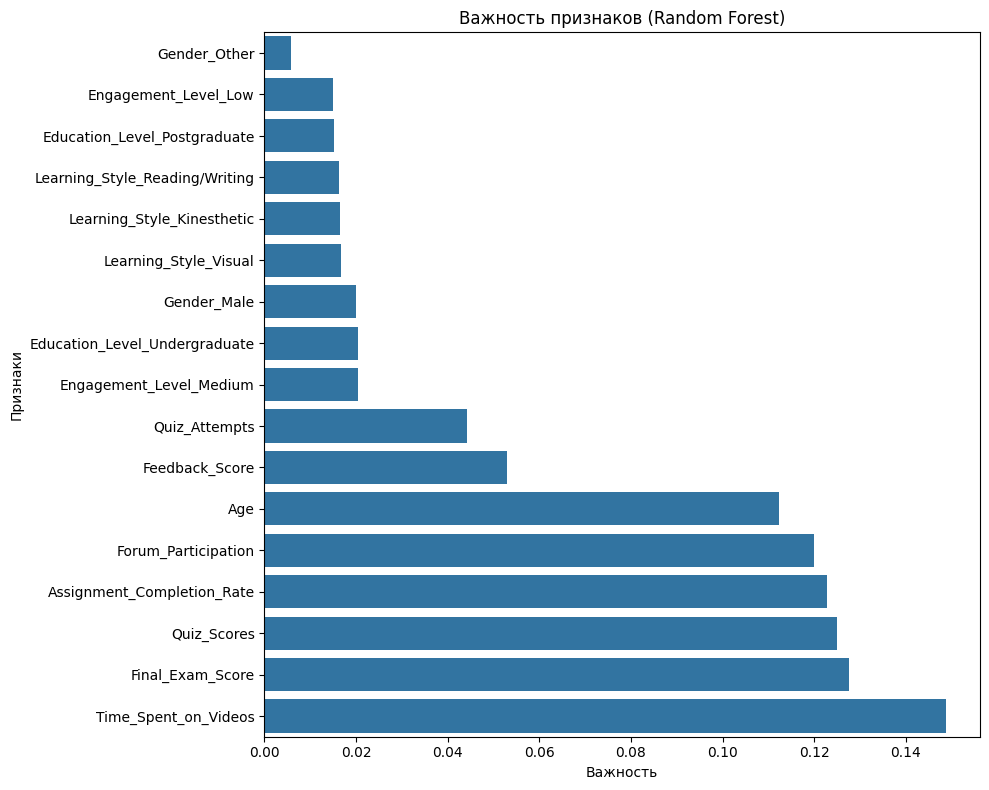

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важность признаков из модели случайного леса
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Построим график
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Важность признаков (Random Forest)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

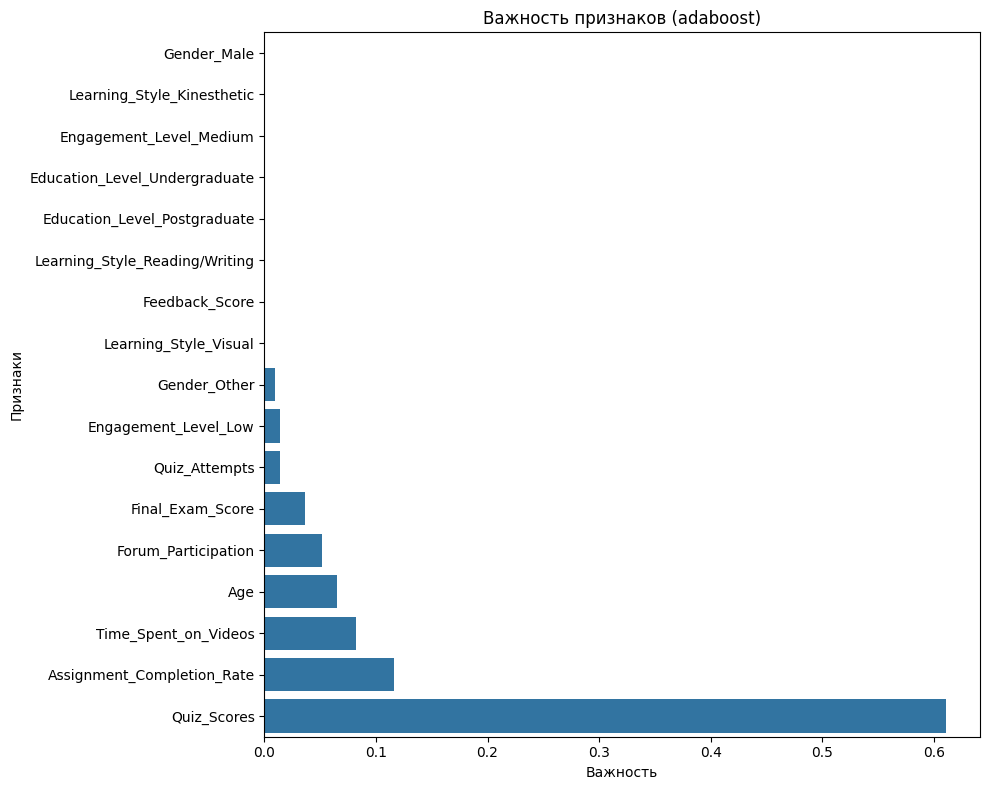

In [11]:
# Получаем важность признаков из модели adaboost
feature_importances = pd.Series(ada.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Построим график
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Важность признаков (adaboost)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

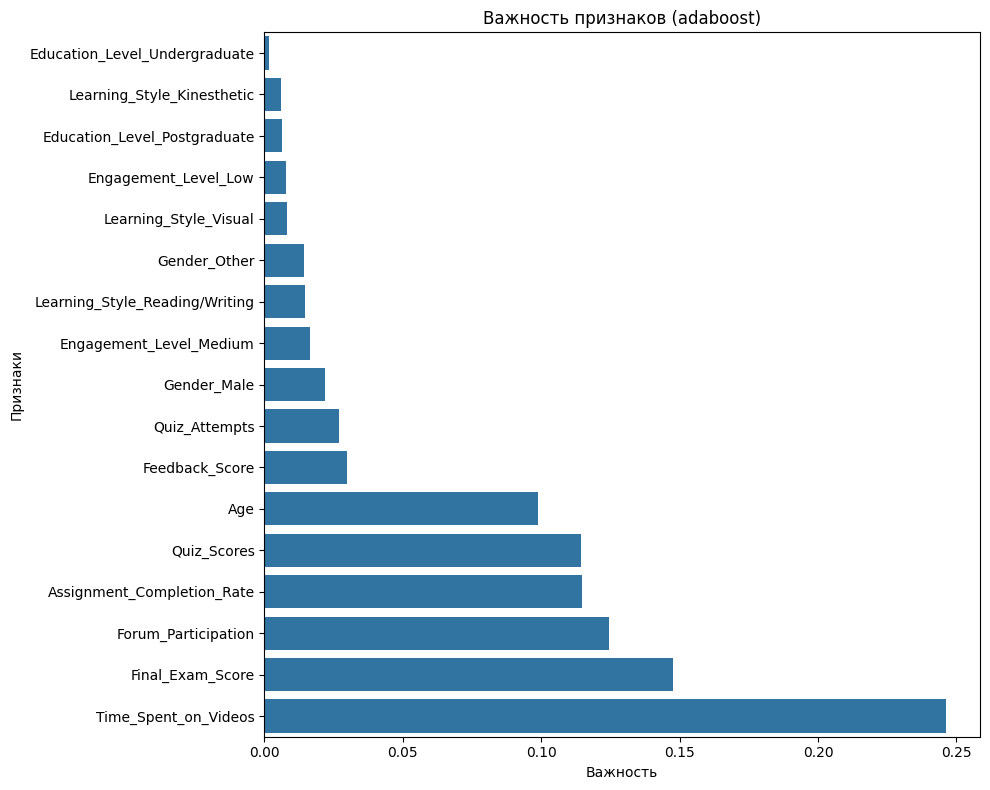

In [ ]:
# Получаем важность признаков из модели gb
feature_importances = pd.Series(gb.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Построим график
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Важность признаков (gb)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

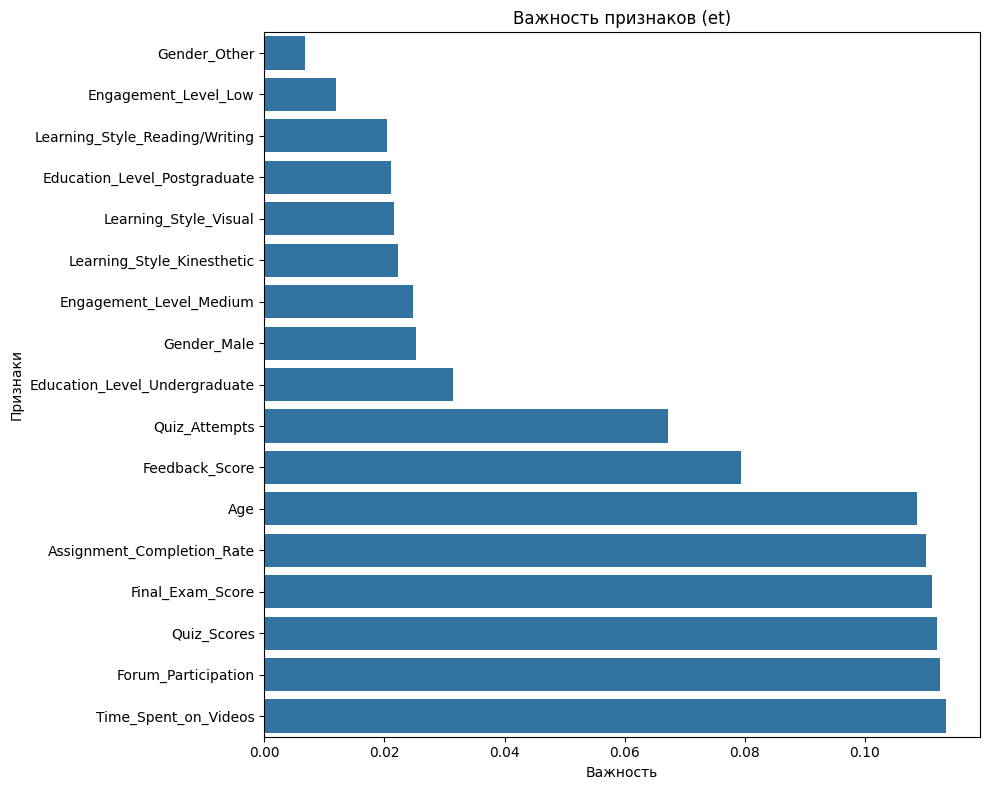

In [13]:
# Получаем важность признаков из модели adaboost
feature_importances = pd.Series(et.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Построим график
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Важность признаков (et)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

In [14]:
# Получаем важность признаков из модели adaboost
feature_importances = pd.Series(bagging.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Построим график
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Важность признаков (bagging)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

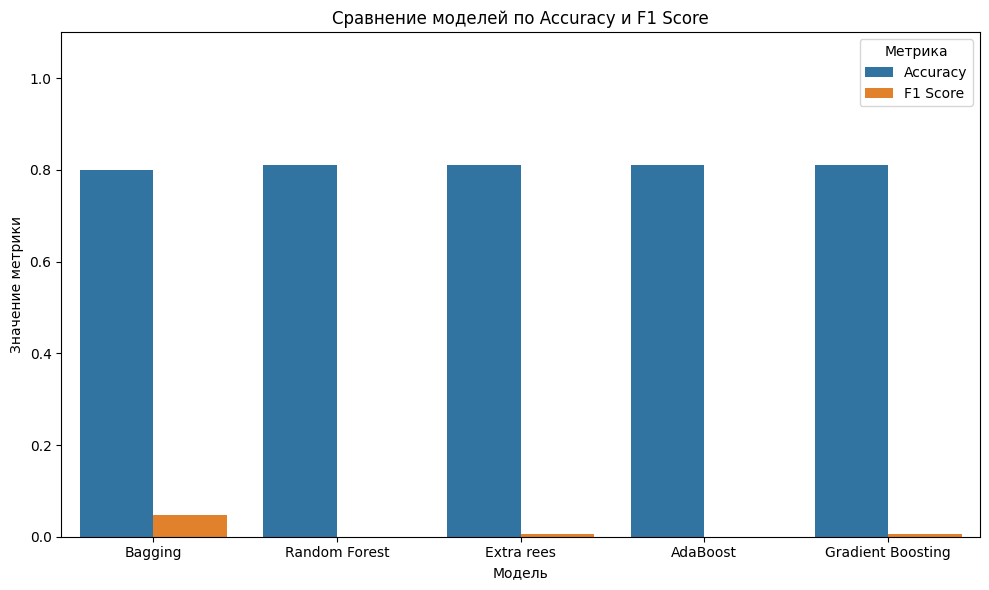

In [15]:
# Сохраним метрики в датафрейм
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Сравнение моделей по Accuracy и F1 Score")
plt.ylabel("Значение метрики")
plt.xlabel("Модель")
plt.ylim(0, 1.1)
plt.legend(title="Метрика")
plt.tight_layout()
plt.show()